In [ ]:
########################part1###########################

Reading the data set from the file and displaying the first 5 rows

In [60]:
import pandas as pd

file_path = './cars.csv'
df = pd.read_csv(file_path)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA


.info() function displays general information about the data frame like the type of each column and the number of non-null values in each column.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        396 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


As observed, the total number of records are 398.
But some columns like horsepower have empty columns which will be dealt with in next parts.

In [62]:
########################part2###########################

In [63]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64

.isnull() returns the null values in each column, sum() counts them

In [64]:
########################part3###########################

describe() gives a general description about each column like the min and max values, mean, std, ...

In [65]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


fillna() fills the null values, I chose the mode because it wont have a big difference in the mean value.
and to assure the reduction of the effect of the new values when passing the data to the model.

In [66]:
mode = df['horsepower'].mode().iloc[0]
df['horsepower'].fillna(mode, inplace=True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64

In [67]:
mode = df['origin'].mode().iloc[0]
df['origin'].fillna(mode, inplace=True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

as shown above, there is no more null values in the data

In [68]:
########################part4###########################

the boxblot figure below shows the whiskers along with the maximum possible value along with the outliers of the data.
check the figure below.

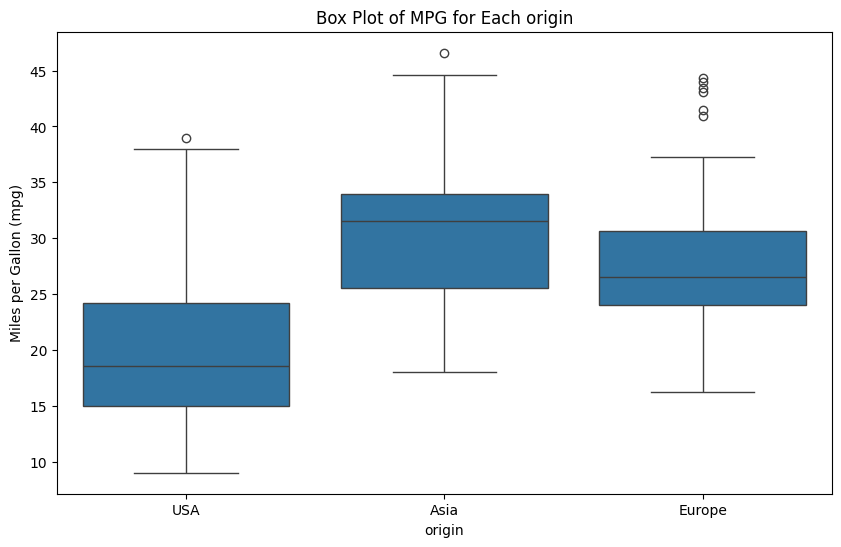

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('Box Plot of MPG for Each origin')
plt.xlabel('origin')
plt.ylabel('Miles per Gallon (mpg)')
plt.show()


In [70]:
########################part5###########################

In the figures below, the data was plotted using histogram to show their distribution

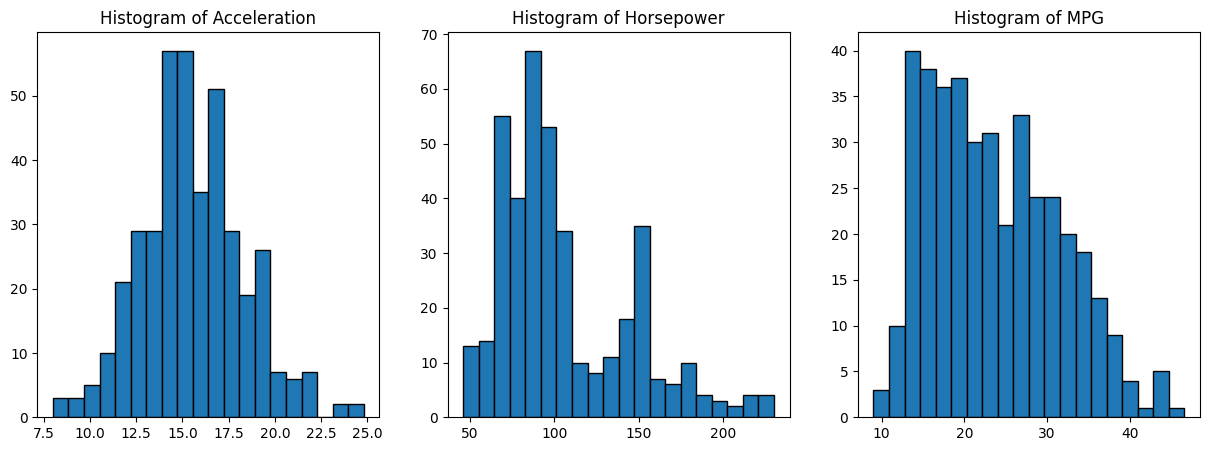

In [71]:
# Create histograms for each feature
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['acceleration'], bins=20, edgecolor='black')
plt.title('Histogram of Acceleration')

plt.subplot(1, 3, 2)
plt.hist(df['horsepower'], bins=20, edgecolor='black')
plt.title('Histogram of Horsepower')

plt.subplot(1, 3, 3)
plt.hist(df['mpg'], bins=20, edgecolor='black')
plt.title('Histogram of MPG')

plt.show()


As shown in the figure above, the acceleration is the most one that is similar to the gaussian distribution.

Extra: In the cell below, a test called Shapiro-Wilk test proved that the distribution of the acceleration is similar to the natural distribution.

In [72]:
from scipy.stats import shapiro

# Assuming df is your DataFrame with columns 'acceleration', 'horsepower', and 'mpg'

# Perform the Shapiro-Wilk test for each feature
shapiro_results = {}
for column in ['acceleration', 'horsepower', 'mpg']:
    stat, p_value = shapiro(df[column])
    shapiro_results[column] = {'Stat': stat, 'P-Value': p_value}

# Display the results
for column, result in shapiro_results.items():
    print(f"Shapiro-Wilk Test for {column}:")
    print(f"  - Statistic: {result['Stat']}")
    print(f"  - P-Value: {result['P-Value']}")
    print("")

# Choose the feature with the highest p-value (closest to a Gaussian distribution)
best_feature = max(shapiro_results, key=lambda x: shapiro_results[x]['P-Value'])
print(f"The feature with the distribution closest to Gaussian: {best_feature}")


Shapiro-Wilk Test for acceleration:
  - Statistic: 0.9923787713050842
  - P-Value: 0.039872437715530396

Shapiro-Wilk Test for horsepower:
  - Statistic: 0.9090427160263062
  - P-Value: 1.0005786753612342e-14

Shapiro-Wilk Test for mpg:
  - Statistic: 0.967965841293335
  - P-Value: 1.1833407853600875e-07

The feature with the distribution closest to Gaussian: acceleration


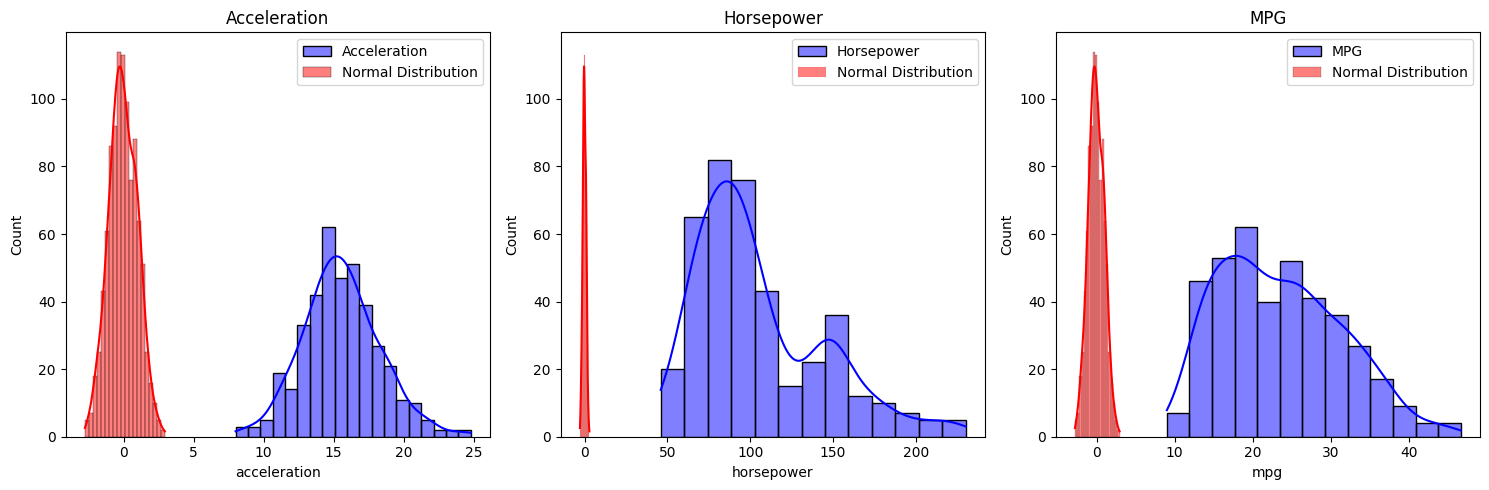

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a random sample with a normal distribution
normal_sample = np.random.normal(size=1000)

# Plot histograms for the original features and the normal sample
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['acceleration'], kde=True, color='blue', label='Acceleration')
sns.histplot(normal_sample, kde=True, color='red', label='Normal Distribution')
plt.legend()
plt.title('Acceleration')

plt.subplot(1, 3, 2)
sns.histplot(df['horsepower'], kde=True, color='blue', label='Horsepower')
sns.histplot(normal_sample, kde=True, color='red', label='Normal Distribution')
plt.legend()
plt.title('Horsepower')

plt.subplot(1, 3, 3)
sns.histplot(df['mpg'], kde=True, color='blue', label='MPG')
sns.histplot(normal_sample, kde=True, color='red', label='Normal Distribution')
plt.legend()
plt.title('MPG')

plt.tight_layout()
plt.show()


Another figure to show how much similarity between the acceleration curve and natural curve.

In [74]:
########################part6###########################

To prove it with numeric values, I had to take random examples to show the similarity between them.

In [75]:
points_to_check = [8, 10, 12, 14, 16, 18, 20, 22, 24]
acceleration_values = df['acceleration']
print("Accelaration:-")
for point in points_to_check:
    count_at_point = sum((acceleration_values >= point - 0.5) & (acceleration_values < point + 0.5))
    print(f'Count of values around {point}: {count_at_point}')

Accelaration:-
Count of values around 8: 1
Count of values around 10: 6
Count of values around 12: 21
Count of values around 14: 50
Count of values around 16: 65
Count of values around 18: 29
Count of values around 20: 12
Count of values around 22: 7
Count of values around 24: 2


In [76]:
points_to_check = [10, 13, 16, 19, 22, 25, 28, 31, 34, 37]
acceleration_values = df['mpg']
print("MPG:-")
for point in points_to_check:
    count_at_point = sum((acceleration_values >= point - 0.5) & (acceleration_values < point + 0.5))
    print(f'Count of values around {point}: {count_at_point}')

MPG:-
Count of values around 10: 2
Count of values around 13: 20
Count of values around 16: 19
Count of values around 19: 22
Count of values around 22: 16
Count of values around 25: 16
Count of values around 28: 14
Count of values around 31: 12
Count of values around 34: 12
Count of values around 37: 5


In [79]:
points_to_check = [50, 70, 90, 110, 130, 150, 170, 190, 210]
acceleration_values = df['horsepower']
print("HorsePower:-")
for point in points_to_check:
    count_at_point = sum((acceleration_values >= point - 0.5) & (acceleration_values < point + 0.5))
    print(f'Count of values around {point}: {count_at_point}')

HorsePower:-
Count of values around 50: 0
Count of values around 70: 12
Count of values around 90: 20
Count of values around 110: 18
Count of values around 130: 5
Count of values around 150: 28
Count of values around 170: 5
Count of values around 190: 3
Count of values around 210: 1


As shown in the three cells above, the acceleration is the correct answer.

In [22]:
########################part7###########################

The data is plotted in a scatter plot below.

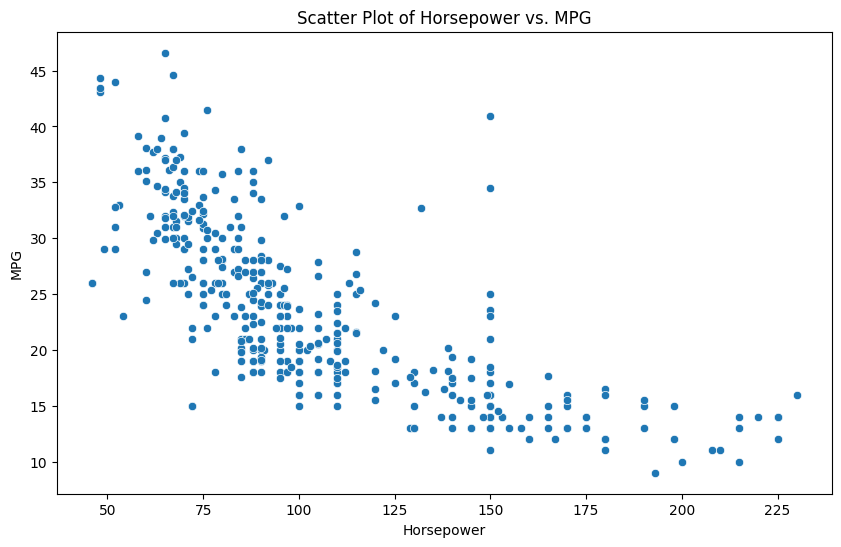

Correlation Coefficient between Horsepower and MPG: -0.7531769820344796
There is a negative correlation.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot of Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

# Calculate and print the correlation coefficient
correlation_coefficient = df['horsepower'].corr(df['mpg'])
print(f"Correlation Coefficient between Horsepower and MPG: {correlation_coefficient}")

# Assess the direction of the correlation
if correlation_coefficient > 0:
    print("There is a positive correlation.")
elif correlation_coefficient < 0:
    print("There is a negative correlation.")
else:
    print("There is no linear correlation.")


In [24]:
########################part8###########################

The code below will implement the linear regression and print the values of theta_0 and theta_1.

Learned Parameters (Closed-Form Solution): theta_0=39.551289806757794, theta_1=-0.15250438074858036


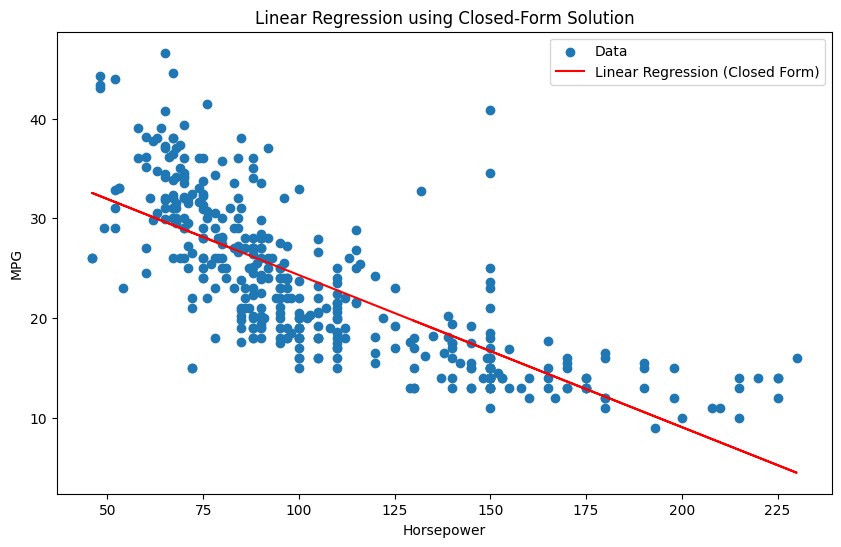

In [80]:
import numpy as np
import matplotlib.pyplot as plt

X = np.c_[np.ones((len(df), 1)), df['horsepower'].values.reshape(-1, 1)]
y = df['mpg'].values.reshape(-1, 1)

# Calculate the closed-form solution
theta_closed_form = np.linalg.inv(X.T @ X) @ X.T  @ y

# Print the learned parameters
print(f'Learned Parameters (Closed-Form Solution): theta_0={theta_closed_form[0][0]}, theta_1={theta_closed_form[1][0]}')

# Make predictions using the learned parameters
predictions_closed_form = X.dot(theta_closed_form)

# Plot the scatter plot and the learned line
plt.figure(figsize=(10, 6))
plt.scatter(df['horsepower'], df['mpg'], label='Data')
plt.plot(df['horsepower'], predictions_closed_form, color='red', label='Linear Regression (Closed Form)')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Linear Regression using Closed-Form Solution')
plt.legend()
plt.show()


the line where : theta_closed_form = np.linalg.inv(X.T @ X) @ X.T  @ y
shows the formula of linear regression.

In [ ]:
########################part9###########################

the cell below implements the quadratic regression based on the formula f = w0 + w1x + w2x^2.
The comment in the code will explain the procedure.

Learned Parameters (Quadratic Regression): theta_0=55.396212698135095, theta_1=-0.4407150894966449, theta_2=0.0011529068807191753


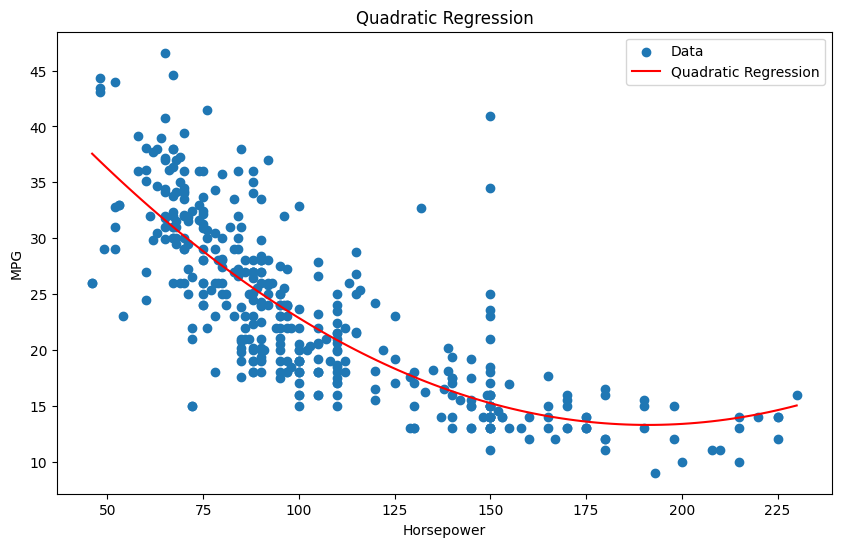

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'horsepower' and 'mpg' are columns in your DataFrame
X_linear = np.c_[np.ones((len(df), 1)), df['horsepower'].values.reshape(-1, 1)]

# Adding quadratic feature
X_quadratic = np.c_[X_linear, X_linear[:, 1] ** 2]

# Calculate the closed-form solution for quadratic regression
theta_quadratic = np.linalg.inv(X_quadratic.T.dot(X_quadratic)).dot(X_quadratic.T).dot(df['mpg'].values.reshape(-1, 1))

# Print the learned parameters for quadratic regression
print(f'Learned Parameters (Quadratic Regression): theta_0={theta_quadratic[0][0]}, theta_1={theta_quadratic[1][0]}, theta_2={theta_quadratic[2][0]}')

# Generate a range of x values
x_range = np.linspace(min(df['horsepower']), max(df['horsepower']), 100).reshape(-1, 1)

# Calculate the corresponding y values using the learned parameters
y_range = theta_quadratic[0] + theta_quadratic[1] * x_range + theta_quadratic[2] * (x_range ** 2)

# Plot the scatter plot and the learned quadratic function
plt.figure(figsize=(10, 6))
plt.scatter(df['horsepower'], df['mpg'], label='Data')
plt.plot(x_range, y_range, color='red', label='Quadratic Regression')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Quadratic Regression')
plt.legend()
plt.show()


As shown in the figure above, the quadratic regression fits better with the data than the linear regression.

In [ ]:
########################part10###########################

The code below will apply the gradient descent algorithm, where the number of epouchs will be changed many times until it reaches the "smallest" possible value that will generate the linear regression.
After many trials, The best I came with was 200000.
The learning rate was a challenge, I started with 0.1 and started decreasing it but the curve did not appear, which made me realize that it is too high.
I continued to decrease it until I finished with 0.0001 which was the first succession, I kept it as it is.

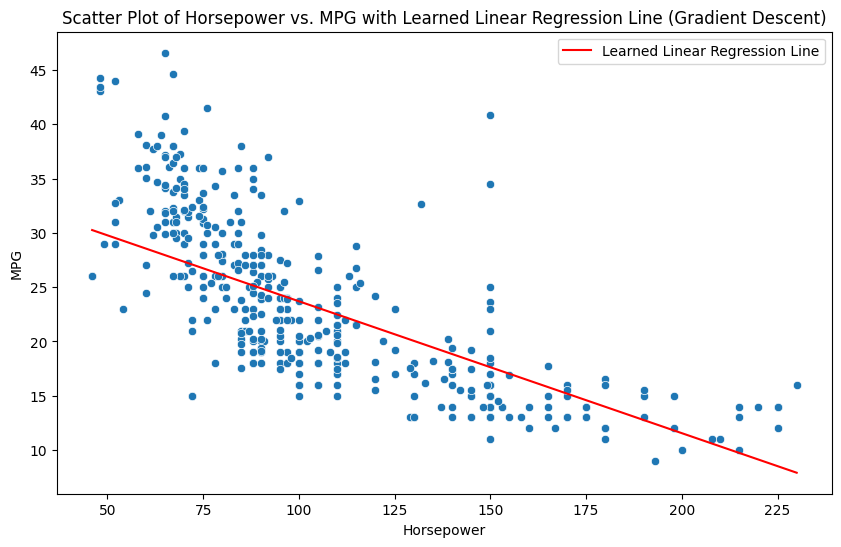

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# a column for the intercept term (x0=1)
df['intercept'] = 1

# Extracting the features and target
X = df[['intercept', 'horsepower']].values
y = df['mpg'].values

# Hyperparameters
learning_rate = 0.0001 # I could not increase it, because it will become too high for the model
epochs = 200000 # if I add one more zero , the line will be more accurate, => 200000 is good

# Initializing weights
theta = np.zeros(X.shape[1])

# Gradient Descent
for epoch in range(epochs):
    # Calculating predictions
    predictions = np.dot(X, theta)

    # Calculating errors
    errors = predictions - y

    # Calculating gradients
    gradients = np.dot(X.T, errors) / len(y)

    # Updating weights
    theta -= learning_rate * gradients

# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)

# the learned linear regression line
x_values = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100).reshape(-1, 1)
x_values = np.insert(x_values, 0, 1, axis=1)  # Add intercept term
y_values = np.dot(x_values, theta)

plt.plot(x_values[:, 1], y_values, color='red', label='Learned Linear Regression Line')

plt.title('Scatter Plot of Horsepower vs. MPG with Learned Linear Regression Line (Gradient Descent)')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()
